<a href="https://colab.research.google.com/github/swastik-thetaonelab/anothermitra/blob/main/Chapter5/natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Natural Language Processing

This section some tools to process and work with text.

### TextBlob: Processing Text in One Line of Code

Processing text doesn’t need to be hard. If you want to find the sentiment of the text, tokenize text, find noun phrase and word frequencies, correct spelling, etc in one line of code, try TextBlob.


In [ ]:
!pip install textblob

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /home/khuyen/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /home/khuyen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/khuyen/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/khuyen/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /home/khuyen/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /home/khuyen/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
from textblob import TextBlob

text = "Today is a beautiful day"
blob = TextBlob(text)

blob.words # Word tokenization

WordList(['Today', 'is', 'a', 'beautiful', 'day'])

In [ ]:
blob.noun_phrases # Noun phrase extraction

WordList(['beautiful day'])

In [ ]:
blob.sentiment # Sentiment analysis

Sentiment(polarity=0.85, subjectivity=1.0)

In [ ]:
blob.word_counts # Word counts

defaultdict(int, {'today': 1, 'is': 1, 'a': 1, 'beautiful': 1, 'day': 1})

In [ ]:
# Spelling correction
text = "Today is a beutiful day"
blob = TextBlob(text)
blob.correct()

TextBlob("Today is a beautiful day")

[Link to TextBlob](https://textblob.readthedocs.io/en/dev/).

[Link to my article about TextBlob](https://towardsdatascience.com/supercharge-your-python-string-with-textblob-2d9c08a8da05?sk=b9de5981cf74c0adf8d9f2a913e3ca05).

### sumy: Summarize Text in One Line of Code

In [ ]:
!pip install sumy

If you want to summarize text using Python or command line, try sumy.

The great things about sumy compared to other summarization tools are that it is easy to use and it allows you to use 7 different methods to summarize the text.

Below is how sumy summarizes the article How to Learn Data Science (Step-By-Step) in 2020 at DataQuest.

```bash
$ sumy lex-rank --length=10 --url=https://www.dataquest.io/blog/learn-data-science/ 
```

In [ ]:
!sumy lex-rank --length=10 --url=https://www.dataquest.io/blog/learn-data-science/ 

So how do you start to learn data science?
If I had started learning data science this way, I never would have kept going.
I learn when I’m motivated, and when I know why I’m learning something.
There’s some science behind this, too.
If you want to learn data science or just pick up some data science skills, your first goal should be to learn to love data.
But it’s important to find that thing that makes you want to learn.
By working on projects, you gain skills that are immediately applicable and useful, because real-world data scientists have to see data science projects through from start to finish, and most of that work is in fundamentals like cleaning and managing the data.
And so on, until the algorithm worked well.
Find people to work with at meetups.
For more information on these, you can take a look at our Data Scientist learning path , which is designed to teach all of the important data science skills for Python learners.


[Link to Sumy](https://github.com/miso-belica/sumy).

### Spacy_streamlit: Create a Web App to Visualize Your Text in 3 Lines of Code

In [ ]:
!pip install spacy-streamlit

If you want to quickly create an app to visualize the structure of a text, try spacy_streamlit. 

To understand how to use spacy_streamlit, we add the code below to a file called `streamlit_app.py`:
```python
# streamlit_app.py
import spacy_streamlit 

models = ['en_core_web_sm']
text = "Today is a beautiful day"
spacy_streamlit.visualize(models, text)
```

On your terminal, type:
```bash
$ streamlit run streamlit_app.py
```
Output:

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
!streamlit run streamlit_app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.90:8501

^C
  Stopping...


Click the URL and you should see something like below:

![image](https://github.com/khuyentran1401/Efficient_Python_tricks_and_tools_for_data_scientists/blob/master/Chapter5/streamlit_app.png?raw=1)

[Link to spacy-streamlit](https://spacy.io/universe/project/spacy-streamlit).

### textacy: Extract a Contiguous Sequence of 2 Words

In [ ]:
!pip install spacy textacy

In [ ]:
!python -m spacy download en_core_web_sm

If you want to extract a contiguous sequence of 2 words, for example, 'data science', not 'data', what should you do? That is when the concept of extracting n-gram from text becomes useful.

A really useful tool to easily extract n-gram with a specified number of words in the sequence is `textacy`. 

In [ ]:
import pandas as pd 
import spacy 
from textacy.extract import ngrams

nlp = spacy.load('en_core_web_sm')

text = nlp('Data science is an inter-disciplinary field that uses'
' scientific methods, processes, algorithms, and systme to extract'
' knowledge and insights from many structural and unstructured data.')

n_grams = 2 # contiguous sequence of a word
min_freq = 1 # extract n -gram based on its frequency

pd.Series([n.text for n in ngrams(text, n=n_grams, min_freq=1)]).value_counts()

Data science          1
disciplinary field    1
uses scientific       1
scientific methods    1
extract knowledge     1
unstructured data     1
dtype: int64

[Link to textacy](https://textacy.readthedocs.io/en/stable/quickstart.html#working-with-text)

### Convert Number to Words


In [ ]:
!pip install num2words

If there are both number 105 and the words ‘one hundred and five’ in a text, they should deliver the same meaning. How can we map 105 to ‘one hundred and five’? There is a Python libary to convert number to words called `num2words`.

In [ ]:
from num2words import num2words

num2words(105)

'one hundred and five'

In [ ]:
num2words(105, to='ordinal')

'one hundred and fifth'

The library can also generate ordinal numbers and support multiple languages! 

In [ ]:
num2words(105, lang='vi')

một trăm lẻ năm


In [ ]:
num2words(105, lang='es')

'ciento cinco'

[Link to num2words](https://github.com/savoirfairelinux/num2words).

### texthero.clean: Preprocess Text in One Line of Code

In [ ]:
!pip install texthero

If you want to preprocess text in one line of code, try texthero. The `texthero.clean` method will:

- fill missing values
- convert upper case to lower case
- remove digits
- remove punctuation
- remove stopwords
- remove whitespace

The code below shows an example of `texthero.clean`.

In [ ]:
import numpy as np
import pandas as pd
import texthero as hero

df = pd.DataFrame(
    {
        "text": [
            "Today is a    beautiful day",
            "There are 3 ducks in this pond",
            "This is. very cool.",
            np.nan,
        ]
    }
)

df.text.pipe(hero.clean)

0    today beautiful day
1             ducks pond
2                   cool
3                       
Name: text, dtype: object

Texthero also provides other useful methods to process and visualize text.

[Link to texthero](https://github.com/jbesomi/texthero).

### wordfreq: Estimate the Frequency of a Word in 36 Languages

In [ ]:
!pip install wordfreq

If you want to look up the frequency of a certain word in your language, try wordfreq.

wordfreq supports 36 languages. wordfreq even covers words that appear at least once per 10 million words.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordfreq import word_frequency

word_frequency("eat", "en")

0.000135

In [ ]:
word_frequency("the", "en")

0.0537

/home/khuyen/book/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


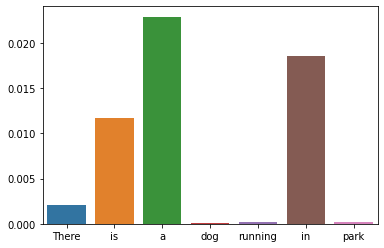

In [ ]:
sentence = "There is a dog running in a park"
words = sentence.split(" ")
word_frequencies = [word_frequency(word, "en") for word in words]

sns.barplot(words, word_frequencies)
plt.show()

[Link to wordfreq](https://github.com/khuyentran1401/Python-data-science-code-snippet/blob/master/code_snippets/data_science_tools/wordfreq_example.py).

### newspaper3k: Extract Meaningful Information From an Articles in 2 Lines of Code

In [ ]:
!pip install newspaper3k nltk

If you want to quickly extract meaningful information from an article in a few lines of code, try newspaper3k. 

In [ ]:
from newspaper import Article
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/khuyen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<IPython.core.display.Javascript object>

In [ ]:
url = "https://www.dataquest.io/blog/learn-data-science/"
article = Article(url)
article.download()
article.parse()

<IPython.core.display.Javascript object>

In [ ]:
article.title

'How to Learn Data Science (A step-by-step guide)'

<IPython.core.display.Javascript object>

In [ ]:
article.publish_date

datetime.datetime(2020, 5, 4, 7, 1, tzinfo=tzutc())

<IPython.core.display.Javascript object>

In [ ]:
article.top_image

'https://www.dataquest.io/wp-content/uploads/2020/05/learn-data-science.jpg'

<IPython.core.display.Javascript object>

In [ ]:
article.nlp()

<IPython.core.display.Javascript object>

In [ ]:
article.summary

'How to Learn Data ScienceSo how do you start to learn data science?\nIf you want to learn data science or just pick up some data science skills, your first goal should be to learn to love data.\nRather, consider it as a rough set of guidelines to follow as you learn data science on your own path.\nI personally believe that anyone can learn data science if they approach it with the right frame of mind.\nI’m also the founder of Dataquest, a site that helps you learn data science in your browser.'

<IPython.core.display.Javascript object>

In [ ]:
article.keywords

['scientists',
 'guide',
 'learning',
 'youre',
 'science',
 'work',
 'skills',
 'youll',
 'data',
 'learn',
 'stepbystep',
 'need']

<IPython.core.display.Javascript object>

[Link to newspaper3k](https://newspaper.readthedocs.io/en/latest/user_guide/quickstart.html?highlight=parse#performing-nlp-on-an-article).



### Questgen.ai: Question Generator in Python

In [ ]:
!pip install git+https://github.com/ramsrigouthamg/Questgen.ai
!pip install git+https://github.com/boudinfl/pke.git

!python -m nltk.downloader universal_tagset
!python -m spacy download en 

In [ ]:
!wget https://github.com/explosion/sense2vec/releases/download/v1.0.0/s2v_reddit_2015_md.tar.gz
!tar -xvf  s2v_reddit_2015_md.tar.gz

It can be time-consuming to generate questions for a document. Wouldn't it be nice if you can automatically generate questions using Python? That is when `Questgen.ai` comes in handy. 

With a few lines of code, the questions for your document are automatically generated.

In [ ]:
from pprint import pprint
import nltk
nltk.download('stopwords')
from Questgen import main

In [ ]:
payload = {
    "input_text": """The weather today was nice so I went for a walk. I stopped for a quick chat with my neighbor.
    It turned out that my neighbor just got a dog named Pepper. It is a black Labrador Retriever."""
}

<IPython.core.display.Javascript object>

With `Questgen.ai`, you can either generate boolean questions:

In [ ]:
qe = main.BoolQGen()
output = qe.predict_boolq(payload)
pprint(output)

{'Boolean Questions': ['Is there a dog in my neighborhood?',
                       "Is pepper my neighbor's dog?",
                       'Is pepper the same as a labrador?'],
 'Count': 4,
 'Text': 'The weather today was nice so I went for a walk. I stopped for a '
         'quick chat with my neighbor.\n'
         '    It turned out that my neighbor just got a dog named Pepper. It '
         'is a black Labrador Retriever.'}


<IPython.core.display.Javascript object>

... or generate FAQ questions:

In [ ]:
output = qg.predict_shortq(payload)
pprint(output)

Running model for generation
{'questions': [{'Question': 'What was the purpose of the stop?', 'Answer': 'chat', 'id': 1, 'context': 'I stopped for a quick chat with my neighbor.'}, {'Question': 'Who got a dog named Pepper?', 'Answer': 'neighbor', 'id': 2, 'context': 'It turned out that my neighbor just got a dog named Pepper. I stopped for a quick chat with my neighbor.'}]}
{'questions': [{'Answer': 'chat',
                'Question': 'What was the purpose of the stop?',
                'context': 'I stopped for a quick chat with my neighbor.',
                'id': 1},
               {'Answer': 'neighbor',
                'Question': 'Who got a dog named Pepper?',
                'context': 'It turned out that my neighbor just got a dog '
                           'named Pepper. I stopped for a quick chat with my '
                           'neighbor.',
                'id': 2}],
 'statement': 'The weather today was nice so I went for a walk. I stopped for '
              'a quick c

<IPython.core.display.Javascript object>

[Link to Questgen.ai](https://github.com/ramsrigouthamg/Questgen.ai).